In [3]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense,Flatten,Conv2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [4]:
(X_Train,Y_Train),(X_Test,Y_Test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [7]:
X_Train.shape,Y_Train.shape,X_Test.shape,Y_Test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
X_Train = X_Train.reshape(60000,28,28,1)
X_Test = X_Test.reshape(10000,28,28,1)

In [9]:
X_Train.shape,Y_Train.shape,X_Test.shape,Y_Test.shape


((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

In [10]:
Y_Test = to_categorical(Y_Test)
Y_Train = to_categorical(Y_Train)

In [15]:
def get_model(input_shape):
  model = Sequential([
                      Conv2D(32,3,activation='relu',input_shape = input_shape),
                      Conv2D(64,3,activation='relu'),
                      Flatten(),
                      Dense(10,activation='softmax')
  ])
  model.summary()
  return model

In [16]:
model = get_model((28,28,1))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 36864)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                368650    
Total params: 387,466
Trainable params: 387,466
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy','mae'])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(patience=3,monitor='accuracy')

In [22]:
model.fit(X_Train,Y_Train,validation_data=(X_Test,Y_Test),epochs=40,verbose=1,batch_size=32,callbacks=[earlystopping] )

Epoch 1/40
1875/1875 [==============================] - 143s 76ms/step - loss: 0.1001 - accuracy: 0.9708 - mae: 0.0079 - val_loss: 0.0886 - val_accuracy: 0.9754 - val_mae: 0.0070
Epoch 2/40
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0577 - accuracy: 0.9825 - mae: 0.0047 - val_loss: 0.0883 - val_accuracy: 0.9752 - val_mae: 0.0060
Epoch 3/40
1875/1875 [==============================] - 143s 77ms/step - loss: 0.0401 - accuracy: 0.9874 - mae: 0.0033 - val_loss: 0.0879 - val_accuracy: 0.9762 - val_mae: 0.0055
Epoch 4/40
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0301 - accuracy: 0.9904 - mae: 0.0025 - val_loss: 0.1171 - val_accuracy: 0.9746 - val_mae: 0.0058
Epoch 5/40
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0244 - accuracy: 0.9925 - mae: 0.0019 - val_loss: 0.0996 - val_accuracy: 0.9786 - val_mae: 0.0046
Epoch 6/40
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0229 - accuracy: 0.9931 

Prediction (Softmax) from the neural network:

 [[0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.1366526e-27
  0.0000000e+00 0.0000000e+00 0.0000000e+00 4.3381121e-27 0.0000000e+00]]


Hard-maxed form of the prediction: 

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




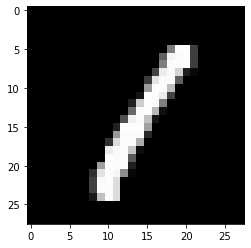



Final Output: 1


In [28]:
example = X_Train[3]
prediction = model.predict(example.reshape(1, 28, 28, 1))

print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))

hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))


print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

In [153]:
image = cv2.imread('./drive/MyDrive/abb.png')
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

In [154]:
ret, thresh = cv2.threshold(grey.copy(), 60, 255, cv2.THRESH_BINARY_INV)

contours,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)




----------------Contoured Image--------------------


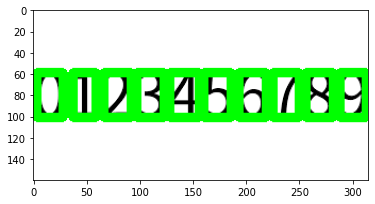

In [158]:
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=4)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)

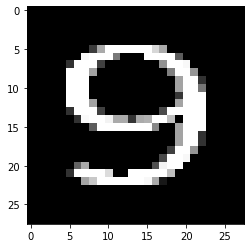



Final Output: 9

Prediction :  [[0.0000000e+00 0.0000000e+00 0.0000000e+00 4.2591807e-24 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]]


Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


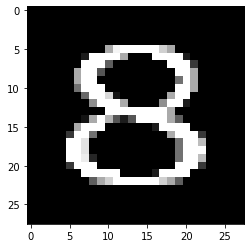



Final Output: 8

Prediction :  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


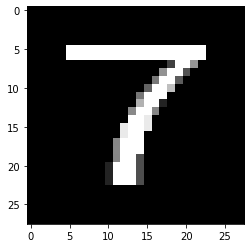



Final Output: 1

Prediction :  [[0.0000000e+00 1.0000000e+00 1.4650470e-19 8.1620730e-16 0.0000000e+00
  0.0000000e+00 0.0000000e+00 3.1569245e-09 5.7133439e-32 0.0000000e+00]]


Hard-maxed form of the prediction:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


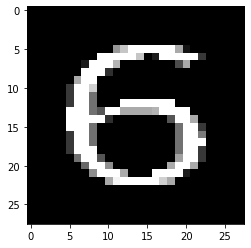



Final Output: 6

Prediction :  [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.4770426e-03 9.9852294e-01 0.0000000e+00 3.3005618e-17 1.5409920e-34]]


Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


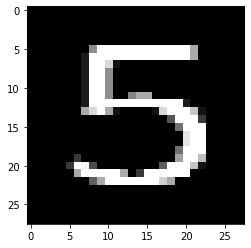



Final Output: 5

Prediction :  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


Hard-maxed form of the prediction:  [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


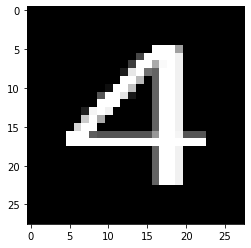



Final Output: 4

Prediction :  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction:  [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


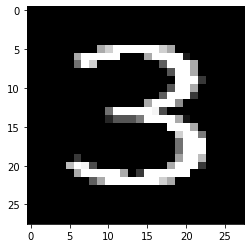



Final Output: 3

Prediction :  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction:  [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


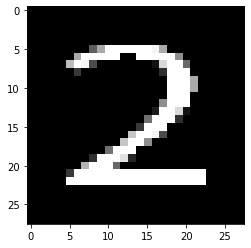



Final Output: 2

Prediction :  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


Hard-maxed form of the prediction:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


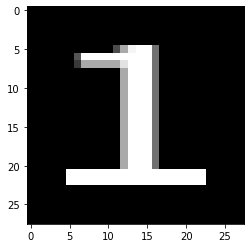



Final Output: 1

Prediction :  [[0.0000000e+00 1.0000000e+00 2.7572299e-27 4.8519434e-24 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 2.1757192e-37 0.0000000e+00]]


Hard-maxed form of the prediction:  [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


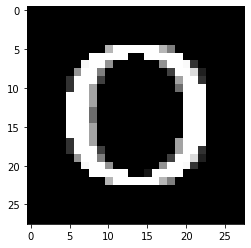



Final Output: 0

Prediction :  [[1.0000000e+00 0.0000000e+00 2.7497401e-35 0.0000000e+00 0.0000000e+00
  0.0000000e+00 2.7054547e-37 0.0000000e+00 2.9922310e-31 4.8230744e-27]]


Hard-maxed form of the prediction:  [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [161]:
for digit in preprocessed_digits:
    prediction = model.predict(digit.reshape(1, 28, 28, 1))  
    
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    
    print ("\nPrediction :  {}".format(prediction))
    
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction:  {}".format(hard_maxed_prediction))
